### Exercises Chapter 9 from the Introduction to Statistical Learning book


#### Exercise 1

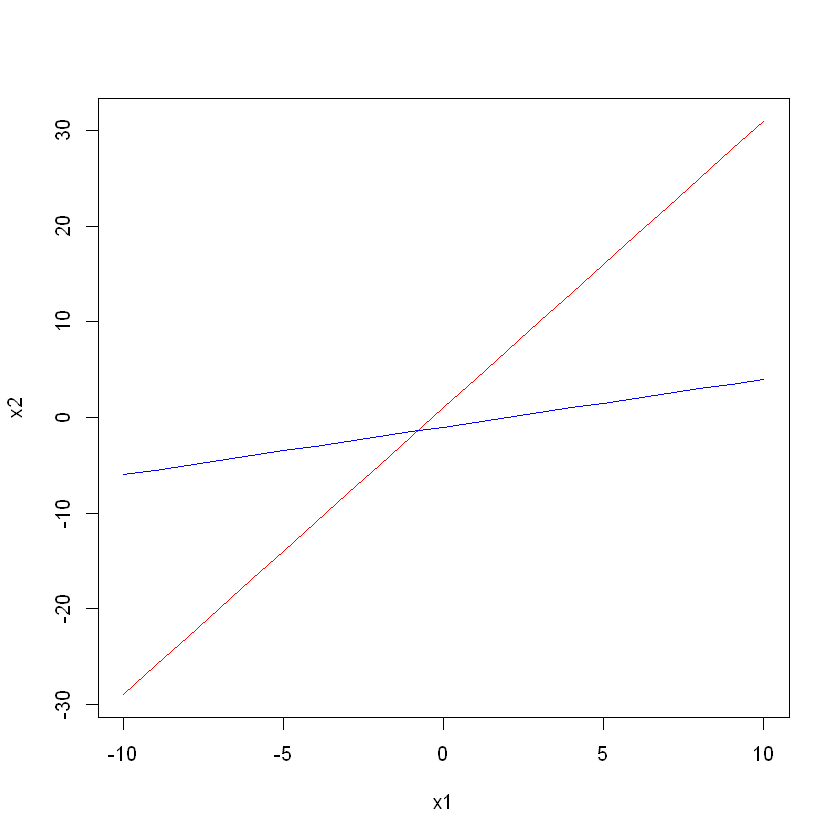

In [10]:
#(a)
x1 <- -10:10
x2 <- 1 + 3 * x1
plot(x1, x2, type = "l", col = "red")
# The points above 0 are the ones under the curve, while the points above the curve are considered below 0

#(b)
lines(x1, -1 + x1/2, col = "blue")
# The points above 0 are the ones under the curve, while the points above the curve are considered below 0


#### Exercise 7

In [13]:
#(a)
library(ISLR)
gas_mil = median(Auto$mpg)
bin_var = ifelse(Auto$mpg > gas_mil, 1, 0)
Auto$mpglevel = as.factor(bin_var)

In [15]:
#(b)
library(e1071)

tune_out = tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(tune_out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01282051 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07410256 0.03319498
2 1e-01 0.04615385 0.04152122
3 1e+00 0.01282051 0.02179068
4 5e+00 0.02032051 0.02336409
5 1e+01 0.02282051 0.02518686
6 1e+02 0.03814103 0.02989201
7 1e+03 0.03814103 0.02989201


In [17]:
#(c)
tune_out_2 <- tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000), degree = c(2, 4)))
summary(tune_out_2)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
 1000      2

- best performance: 0.2374359 

- Detailed performance results:
    cost degree     error dispersion
1  1e-02      2 0.5792308 0.04197965
2  1e-01      2 0.5792308 0.04197965
3  1e+00      2 0.5792308 0.04197965
4  5e+00      2 0.5792308 0.04197965
5  1e+01      2 0.5793590 0.05129078
6  1e+02      2 0.3012179 0.08591787
7  1e+03      2 0.2374359 0.09548543
8  1e-02      4 0.5792308 0.04197965
9  1e-01      4 0.5792308 0.04197965
10 1e+00      4 0.5792308 0.04197965
11 5e+00      4 0.5792308 0.04197965
12 1e+01      4 0.5792308 0.04197965
13 1e+02      4 0.5792308 0.04197965
14 1e+03      4 0.5716026 0.04078684


In [19]:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpglevel
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


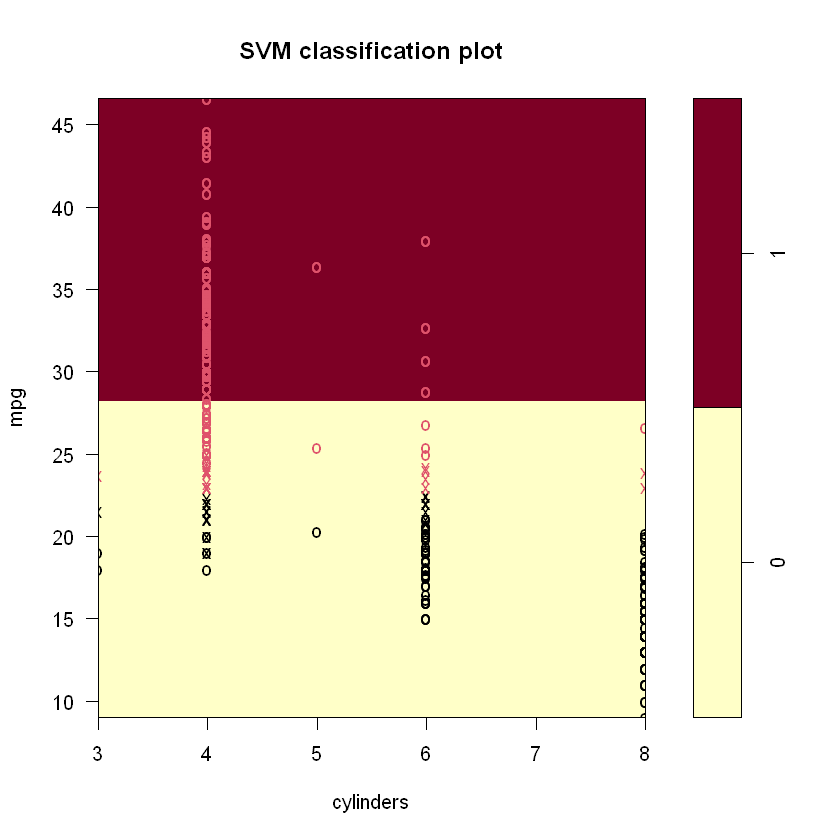

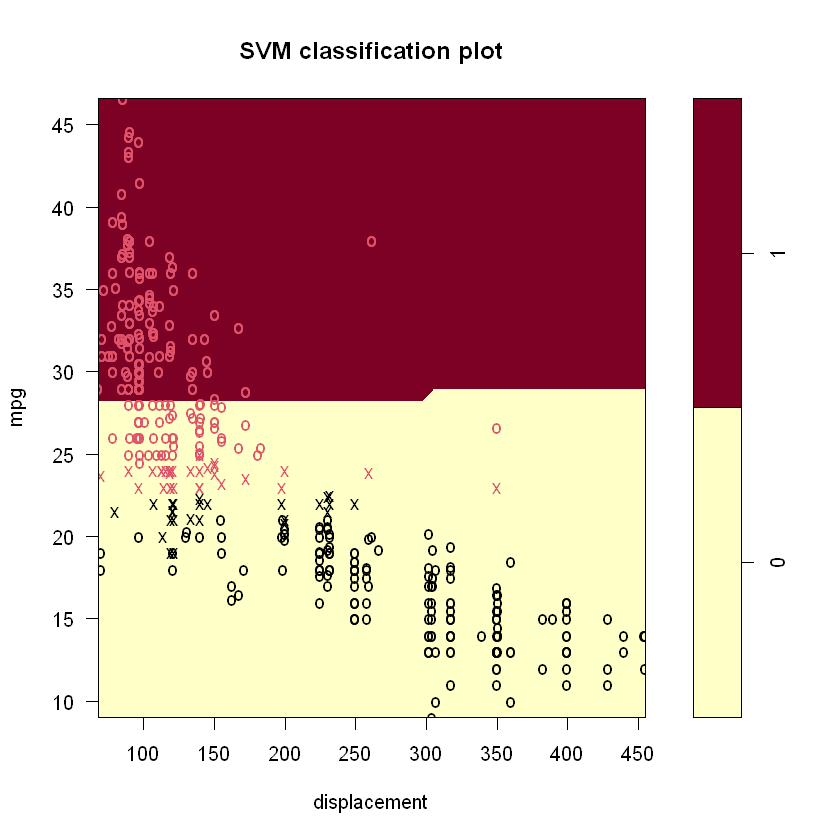

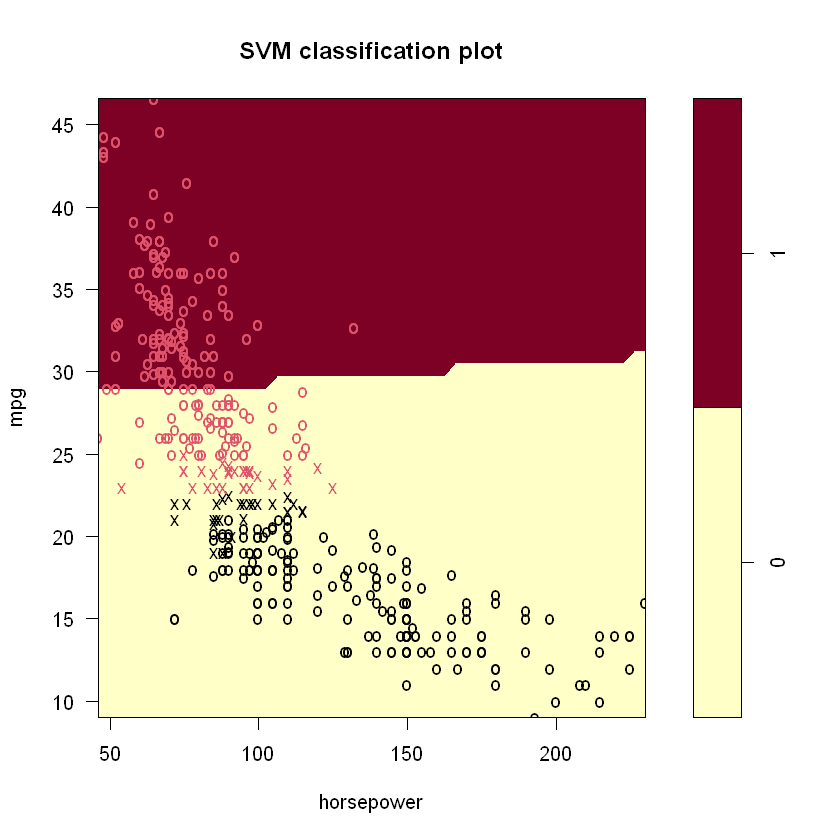

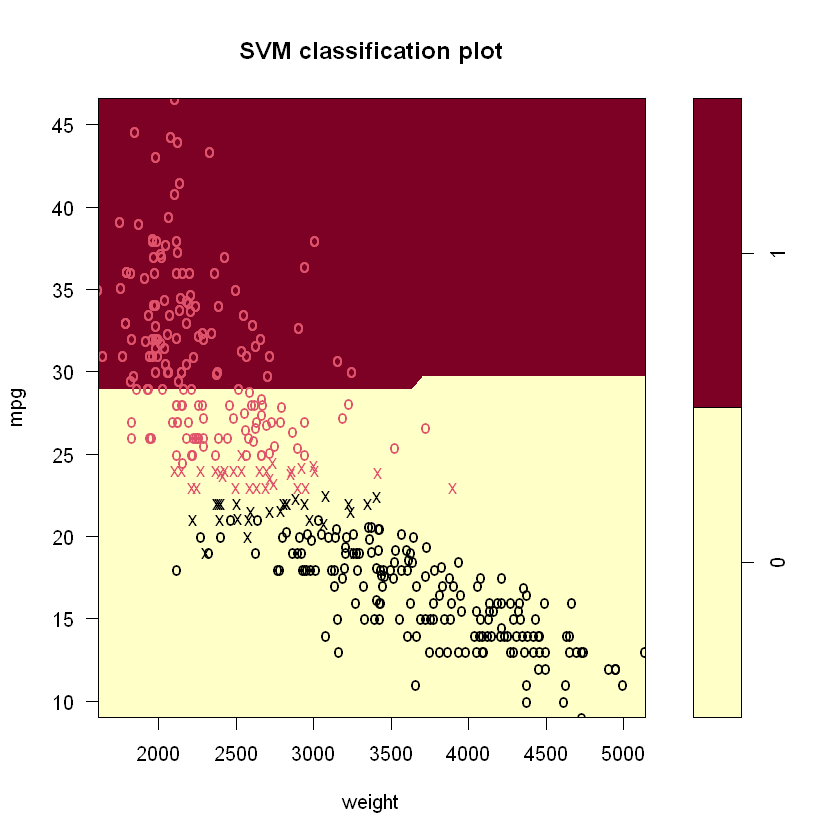

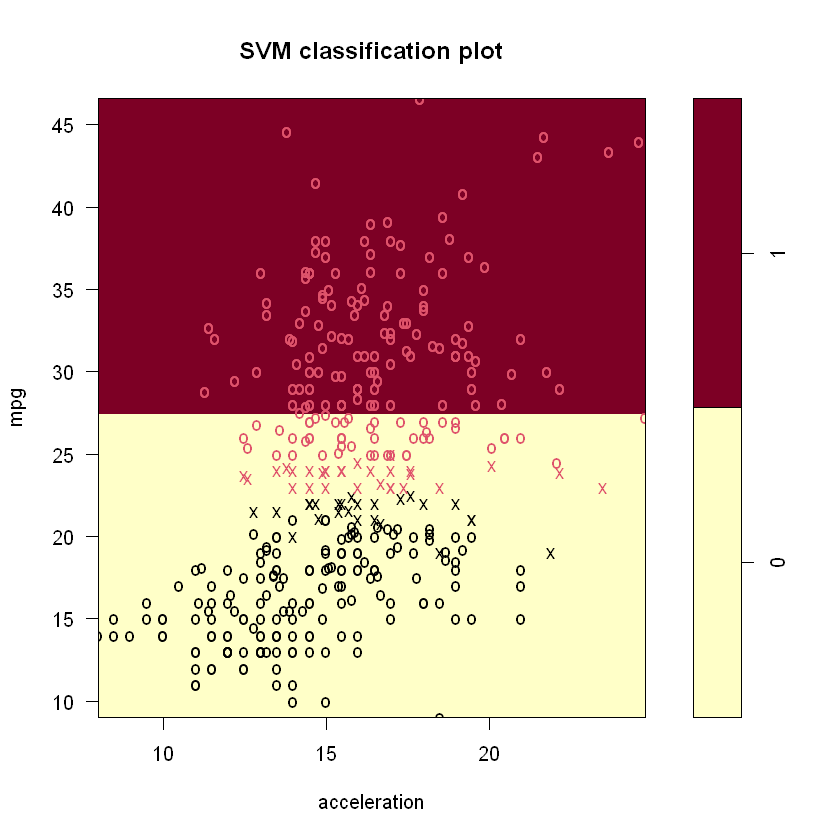

In [24]:
#(d)
svmfit_lin = svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
plot(svmfit_lin, Auto, mpg ~ cylinders)
plot(svmfit_lin, Auto, mpg ~ displacement)
plot(svmfit_lin, Auto, mpg ~ horsepower)
plot(svmfit_lin, Auto, mpg ~ weight)
plot(svmfit_lin, Auto, mpg ~ acceleration)

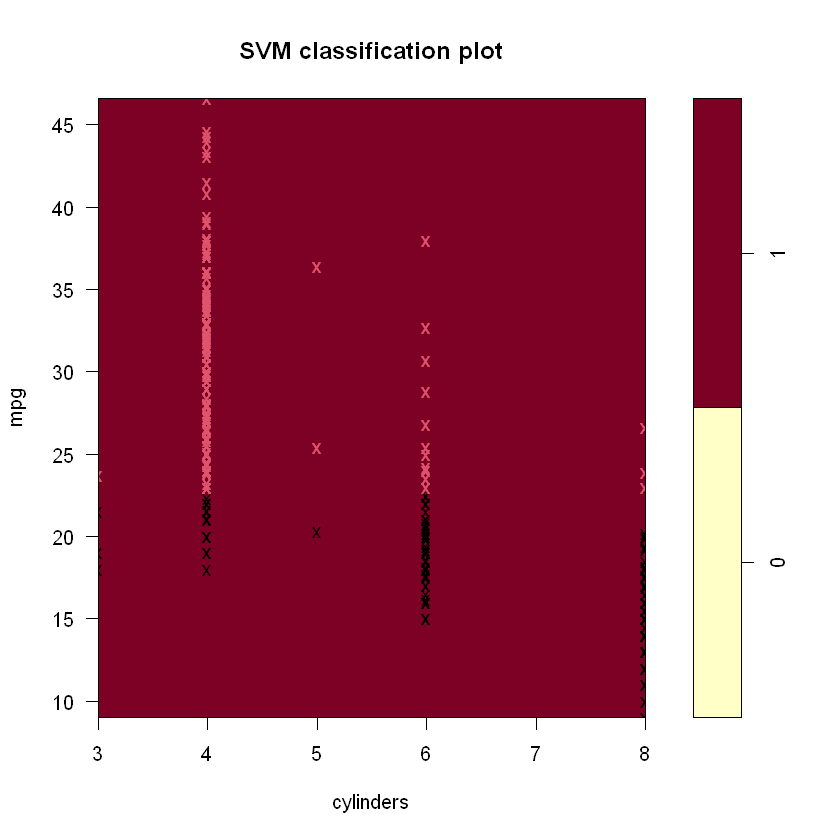

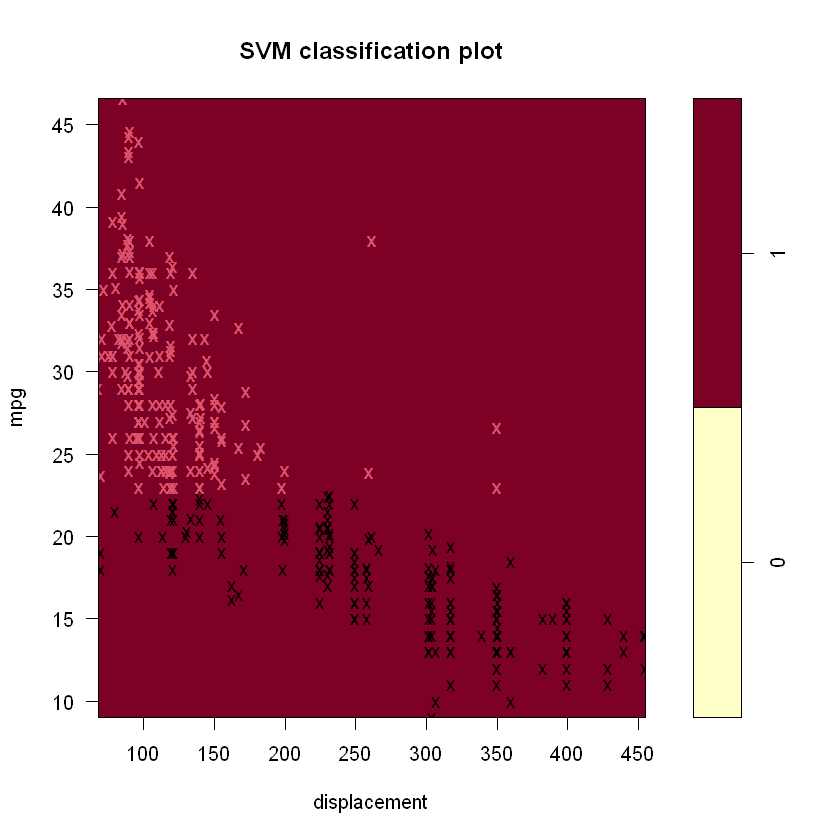

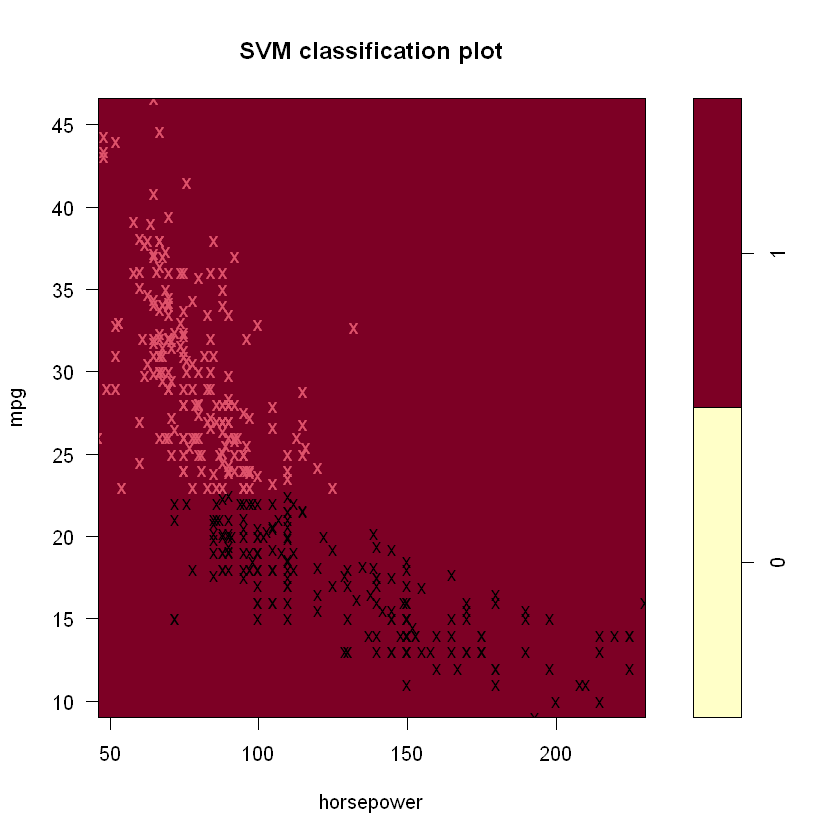

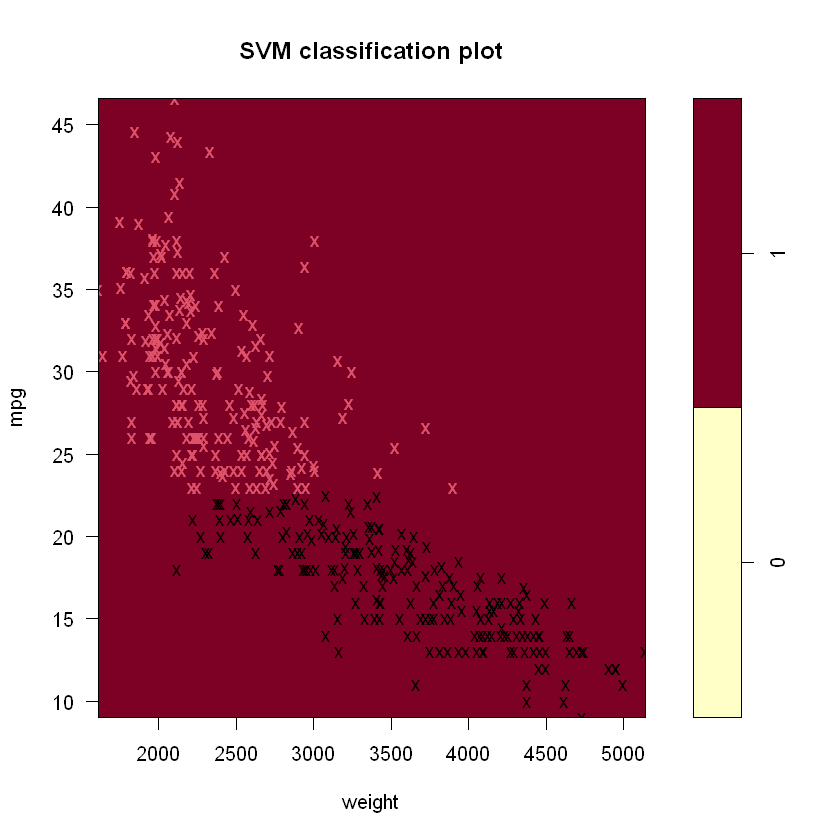

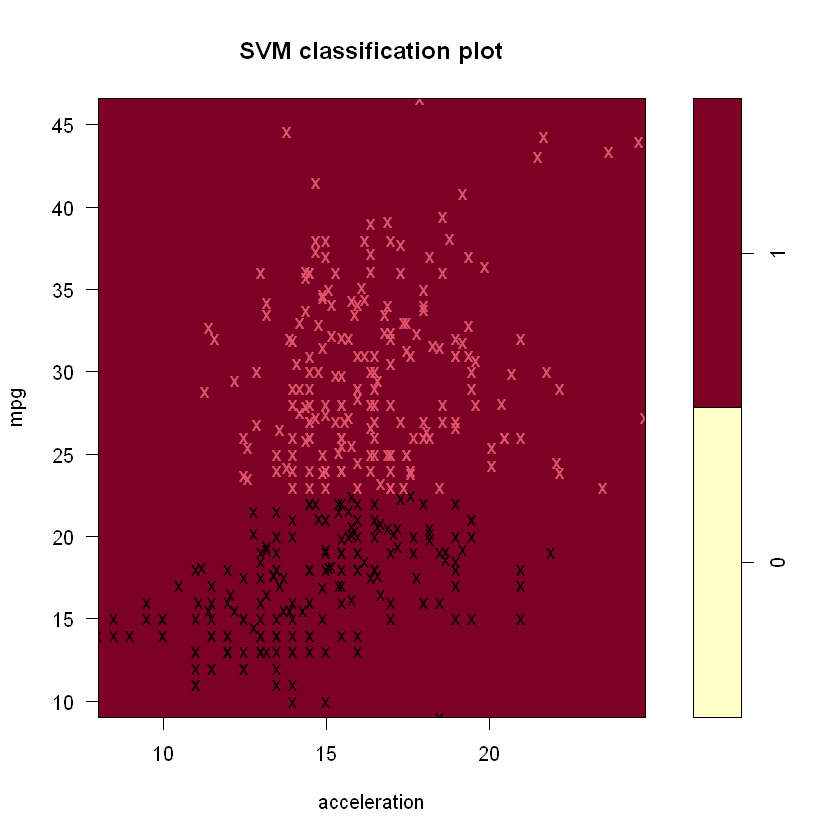

In [25]:
#(d)

svmfit_poly = svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 10, degree = 2)
plot(svmfit_poly, Auto, mpg ~ cylinders)
plot(svmfit_poly, Auto, mpg ~ displacement)
plot(svmfit_poly, Auto, mpg ~ horsepower)
plot(svmfit_poly, Auto, mpg ~ weight)
plot(svmfit_poly, Auto, mpg ~ acceleration)


#### Exercise 8

In [28]:
#install.packages("ISLR2")
library(ISLR2)
head(OJ)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [29]:
#(a)
set.seed(1)
train <- sample(nrow(OJ), 800)
OJ_train <- OJ[train, ]
OJ_test <- OJ[-train, ]

In [30]:
#(b)
svmfit_lin <- svm(Purchase ~ ., data = OJ_train, kernel = "linear", cost = 0.01)
summary(svmfit_lin)


Call:
svm(formula = Purchase ~ ., data = OJ_train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  435

 ( 219 216 )


Number of Classes:  2 

Levels: 
 CH MM




In [36]:
#(c)
train_pred <- predict(svmfit_lin, OJ_train)
table(OJ_train$Purchase, train_pred)

(65+75)/800
# Train error rate is 0.175

test_pred <- predict(svmfit_lin, OJ_test)
table(OJ_test$Purchase, test_pred)

(33+15)/800
# Test error rate is 0.06

    train_pred
      CH  MM
  CH 420  65
  MM  75 240

[1] 0.175

    test_pred
      CH  MM
  CH 153  15
  MM  33  69

[1] 0.06

In [39]:
#(d)
tune_out <- tune(svm, Purchase ~ ., data = OJ, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10)))
summary(tune_out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.1672897 

- Detailed performance results:
   cost     error dispersion
1  0.01 0.1738318 0.02929012
2  0.10 0.1719626 0.02687085
3  1.00 0.1691589 0.03425375
4  5.00 0.1672897 0.03098083
5 10.00 0.1691589 0.03160113


In [44]:
#(e)
svmfit_linear <- svm(Purchase ~ ., kernel = "linear", data = OJ_train, cost = tune_out$best.parameter$cost)
train_pred_new <- predict(svmfit_linear, OJ_train)
table(OJ_train$Purchase, train_pred_new)

(71+62)/800
# The train error rate is 0.166

test_pred_new <- predict(svmfit_linear, OJ_test)
table(OJ_test$Purchase, test_pred_new)
(29+13)/800
# The train error rate is 0.05

    train_pred_new
      CH  MM
  CH 423  62
  MM  71 244

[1] 0.16625

    test_pred_new
      CH  MM
  CH 155  13
  MM  29  73

[1] 0.0525

In [46]:
#(f)
svmfit_rad <- svm(Purchase ~ ., data = OJ_train, kernel = "radial", cost = 0.01)
summary(svmfit_rad)

train_pred_rad <- predict(svmfit_rad, OJ_train)
table(OJ_train$Purchase, train_pred_rad)

315/800
# Train error rate is 0.39

test_pred_rad <- predict(svmfit_rad, OJ_test)
table(OJ_test$Purchase, test_pred_rad)

102/800
# Test error rate is 0.13

tune_out_rad <- tune(svm, Purchase ~ ., data = OJ, kernel = "radial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10)))
summary(tune_out_rad)

svmfit_radial <- svm(Purchase ~ ., kernel = "radial", data = OJ_train, cost = tune_out_rad$best.parameter$cost)
train_pred_rad_new <- predict(svmfit_radial, OJ_train)
table(OJ_train$Purchase, train_pred_rad_new)

(77+44)/800
# The train error rate is 0.15

test_pred_rad_new <- predict(svmfit_radial, OJ_test)
table(OJ_test$Purchase, test_pred_rad_new)
(33+17)/800
# The train error rate is 0.06


Call:
svm(formula = Purchase ~ ., data = OJ_train, kernel = "radial", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.01 

Number of Support Vectors:  634

 ( 319 315 )


Number of Classes:  2 

Levels: 
 CH MM




    train_pred_rad
      CH  MM
  CH 485   0
  MM 315   0

[1] 0.39375

    test_pred_rad
      CH  MM
  CH 168   0
  MM 102   0

[1] 0.1275


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.1747664 

- Detailed performance results:
   cost     error dispersion
1  0.01 0.3897196 0.05324278
2  0.10 0.1803738 0.04786774
3  1.00 0.1757009 0.05301445
4  5.00 0.1747664 0.05004826
5 10.00 0.1794393 0.05038646


    train_pred_rad_new
      CH  MM
  CH 443  42
  MM  75 240

[1] 0.15125

    test_pred_rad_new
      CH  MM
  CH 154  14
  MM  34  68

[1] 0.0625

In [49]:
#(g)

svmfit_poly <- svm(Purchase ~ ., data = OJ_train, kernel = "polynomial", degree = 2)
summary(svmfit_poly)

train_pred_poly <- predict(svmfit_poly, OJ_train)
table(OJ_train$Purchase, train_pred_poly)

(110+36)/800
# Train error rate is 0.18

test_pred_poly <- predict(svmfit_poly, OJ_test)
table(OJ_test$Purchase, test_pred_poly)

(45+15)/800
# Test error rate is 0.08

tune_out_poly <- tune(svm, Purchase ~ ., data = OJ, kernel = "polynomial", degree = 2, ranges = list(cost = c(0.01, 0.1, 1, 5, 10)))
summary(tune_out_poly)

svmfit_polynomial <- svm(Purchase ~ ., kernel = "polynomial", data = OJ_train, degree = 2, cost = tune_out_poly$best.parameter$cost)
train_pred_poly_new <- predict(svmfit_polynomial, OJ_train)
table(OJ_train$Purchase, train_pred_poly_new)

(82+38)/800
# The train error rate is 0.15

test_pred_poly_new <- predict(svmfit_polynomial, OJ_test)
table(OJ_test$Purchase, test_pred_poly_new)
(37+14)/800
# The train error rate is 0.064


Call:
svm(formula = Purchase ~ ., data = OJ_train, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  447

 ( 225 222 )


Number of Classes:  2 

Levels: 
 CH MM




    train_pred_poly
      CH  MM
  CH 449  36
  MM 110 205

[1] 0.1825

    test_pred_poly
      CH  MM
  CH 153  15
  MM  45  57

[1] 0.075


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.1691589 

- Detailed performance results:
   cost     error dispersion
1  0.01 0.3691589 0.04831172
2  0.10 0.3056075 0.05024179
3  1.00 0.1906542 0.02961960
4  5.00 0.1738318 0.02613854
5 10.00 0.1691589 0.03481578


    train_pred_poly_new
      CH  MM
  CH 447  38
  MM  82 233

[1] 0.15

    test_pred_poly_new
      CH  MM
  CH 154  14
  MM  37  65

[1] 0.06375